# 数据下载

In [1]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from tqdm import tqdm
import tushare as tu
import pandas as pd
import numpy as np
import os
import time
from itertools import product

%matplotlib inline
plt.rcParams['axes.unicode_minus']=False

tu.set_token('13bb0841c8a377221b39d9142f42bae2e2e9a897b9f692c75dd90d65')
pro = tu.pro_api()

In [6]:
# 下载交易日序列
trade_cal_df = pro.query('trade_cal', start_date='20050101', end_date='20240731')
trade_cal_df = trade_cal_df[trade_cal_df['is_open']==1]['cal_date']
trade_cal_df=trade_cal_df.sort_values()
trade_cal_df

7148    20050104
7147    20050105
7146    20050106
7145    20050107
7142    20050110
          ...   
6       20240725
5       20240726
2       20240729
1       20240730
0       20240731
Name: cal_date, Length: 4756, dtype: object

In [28]:
df_us_interest_rate = pro.us_tycr(start_date='20150101', end_date='20240731').set_index('date')
df_us_interest_rate

,m1,m2,m3,m6,y1,y2,y3,y5,y7,y10,y20,y30
date,,,,,,,,,,,,
20240730,5.50,5.50,5.40,5.16,4.78,4.35,4.16,4.03,4.06,4.15,4.50,4.40
20240729,5.50,5.51,5.41,5.18,4.79,4.36,4.19,4.05,4.08,4.17,4.51,4.42
20240726,5.49,5.51,5.38,5.18,4.79,4.36,4.20,4.06,4.10,4.20,4.53,4.45
20240725,5.49,5.52,5.39,5.19,4.83,4.41,4.26,4.13,4.18,4.27,4.59,4.50
20240724,5.50,5.50,5.40,5.19,4.82,4.37,4.24,4.12,4.20,4.28,4.62,4.54
...,...,...,...,...,...,...,...,...,...,...,...,...
20160804,0.24,NaN,0.26,0.41,0.51,0.64,0.76,1.03,1.31,1.51,1.84,2.25
20160803,0.26,NaN,0.28,0.42,0.53,0.67,0.78,1.07,1.35,1.55,1.88,2.29
20160802,0.28,NaN,0.29,0.41,0.50,0.67,0.79,1.07,1.36,1.55,1.88,2.29


In [29]:
df_chn_interest_rate=pro.shibor(start_date='20150101', end_date='20240731').set_index('date')
df_chn_interest_rate

,on,1w,2w,1m,3m,6m,9m,1y
date,,,,,,,,
20240730,1.639,1.814,1.887,1.8390,1.8650,1.9160,1.9510,1.9660
20240729,1.631,1.895,1.911,1.8430,1.8690,1.9200,1.9560,1.9729
20240726,1.689,1.913,1.895,1.8480,1.8770,1.9270,1.9610,1.9790
20240725,1.764,1.871,1.908,1.8550,1.8820,1.9320,1.9670,1.9850
20240724,1.739,1.742,1.891,1.8620,1.8870,1.9370,1.9730,1.9930
...,...,...,...,...,...,...,...,...
20160704,2.014,2.355,2.794,2.8690,2.9672,2.9900,3.0012,3.0500
20160701,2.027,2.365,2.801,2.8770,2.9661,2.9899,3.0012,3.0500
20160630,2.037,2.385,2.800,2.8870,2.9659,2.9887,3.0012,3.0500


In [30]:
df_chn_interest_rate['1y']

date
20240730    1.9660
20240729    1.9729
20240726    1.9790
20240725    1.9850
20240724    1.9930
             ...  
20160704    3.0500
20160701    3.0500
20160630    3.0500
20160629    3.0510
20160628    3.0510
Name: 1y, Length: 2000, dtype: float64

In [43]:
df_fx=pro.fx_daily(ts_code='USDCNH.FXCM', start_date='20150101', end_date='20240731').set_index('trade_date')
df_fx

,ts_code,bid_open,bid_close,bid_high,bid_low,ask_open,ask_close,ask_high,ask_low,tick_qty
trade_date,,,,,,,,,,
20240730,USDCNH.FXCM,7.24221,7.23406,7.25271,7.22472,7.24535,7.23475,7.25298,7.22540,328046
20240729,USDCNH.FXCM,7.27001,7.24221,7.27587,7.23469,7.27317,7.24535,7.27646,7.23535,731536
20240728,USDCNH.FXCM,7.26130,7.27001,7.27361,7.25837,7.26512,7.27317,7.27422,7.25893,571472
20240727,USDCNH.FXCM,7.26040,7.26130,7.26146,7.26040,7.26595,7.26512,7.26857,7.26512,250
20240725,USDCNH.FXCM,7.23950,7.26040,7.26617,7.23308,7.24083,7.26595,7.26821,7.23375,305958
...,...,...,...,...,...,...,...,...,...,...
20150107,USDCNH.FXCM,6.21071,6.21400,6.21985,6.20596,6.21335,6.21660,6.22365,6.21010,18300
20150106,USDCNH.FXCM,6.22649,6.21071,6.22726,6.20590,6.22913,6.21335,6.23000,6.20843,20300
20150105,USDCNH.FXCM,6.22692,6.22649,6.23250,6.22032,6.23010,6.22913,6.23486,6.22290,14780


In [62]:
comp_df_1yr=pd.concat([df_us_interest_rate['y1'],df_chn_interest_rate['1y'],df_fx['bid_close']],axis=1).bfill()
comp_df_1yr=comp_df_1yr.sort_index()
comp_df_1yr['diff']=comp_df_1yr['y1']-comp_df_1yr['1y']
comp_df_1yr.sample(20)

,y1,1y,bid_close,diff
20201230,0.12,3.000,6.50262,-2.880
20210518,0.06,2.930,6.41767,-2.870
20151023,NaN,NaN,6.39231,NaN
20191020,NaN,NaN,7.07022,NaN
20220828,NaN,NaN,6.88727,NaN
20180228,2.07,4.742,6.33054,-2.672
20160322,NaN,NaN,6.49236,NaN
20150526,NaN,NaN,6.20811,NaN
20220317,1.30,2.593,6.36160,-1.293
20180508,2.26,4.348,6.36476,-2.088


In [91]:
comp_df_6m=pd.concat([df_us_interest_rate['m6'],df_chn_interest_rate['6m'],df_fx['bid_close']],axis=1).bfill()
comp_df_6m=comp_df_6m.sort_index()
comp_df_6m['diff']=comp_df_6m['m6']-comp_df_6m['6m']
comp_df_6m.sample(20)

,m6,6m,bid_close,diff
20170927,1.20,4.3875,6.63670,-3.1875
20151111,NaN,NaN,6.38950,NaN
20180803,2.23,3.2130,6.84685,-0.9830
20170822,1.13,4.3872,6.66859,-3.2572
20170720,1.12,4.3597,6.75571,-3.2397
20170424,0.96,4.3276,6.88319,-3.3676
20160530,NaN,NaN,6.58660,NaN
20170619,1.13,4.5430,6.82735,-3.4130
20161121,0.60,2.9852,6.90195,-2.3852
20210716,0.05,2.5430,6.47383,-2.4930


## plot out

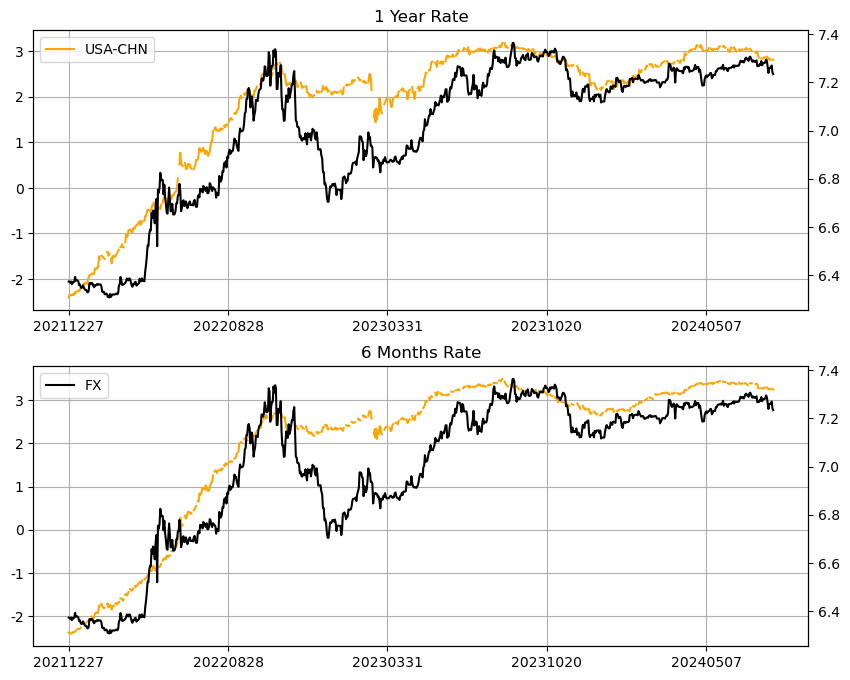

In [96]:
plt.figure(figsize=(10,8))
ax1=plt.subplot(211)
plt.title("1 Year Rate")
ax2=ax1.twinx()
# plt.plot(comp_df_1yr['y1'],label='USA',color='blue',alpha=0.6)
# plt.plot(comp_df_1yr['1y'],label='CHN',color='firebrick',alpha=0.6)
ax1.plot(comp_df_1yr['diff'].loc['20211227':],label='USA-CHN',color='orange')
ax2.plot(comp_df_1yr['bid_close'].loc['20211227':],label='FX',color='black')
ax1.set_xticks(comp_df_1yr.loc['20211227':].index[::200])
ax1.legend()
ax1.grid()

ax1=plt.subplot(212)
plt.title("6 Months Rate")
ax2=ax1.twinx()
# plt.plot(comp_df_1yr['y1'],label='USA',color='blue',alpha=0.6)
# plt.plot(comp_df_1yr['1y'],label='CHN',color='firebrick',alpha=0.6)
ax1.plot(comp_df_6m['diff'].loc['20211227':],label='USA-CHN',color='orange')
ax2.plot(comp_df_6m['bid_close'].loc['20211227':],label='FX',color='black')
ax1.set_xticks(comp_df_6m.loc['20211227':].index[::200])

ax2.legend()
ax1.grid()
plt.show()

In [ ]:
dates_1d=pd.date_range(start='2005-01-01',end='2023-11-01').date
dates_1d=[d.strftime('%Y%m%d') for d in dates_1d]

stk_remain_df=pd.read_csv('../data/remain_st_susp_new.csv',usecols=[1,2,3]).pivot(index='tradedate',columns='code',values='filtered_allstock_field')
stk_remain_df=stk_remain_df.rename(columns={i:i[:7]+( 'SH' if i[-1]=='G' else 'SZ')  for i in stk_remain_df.columns})
stk_remain_df=stk_remain_df.rename(index={d:d.replace('-','') for d in list(stk_remain_df.index)})

codes=stk_remain_df.columns
stk_remain_df=stk_remain_df.reindex(dates_1d,method='ffill')

In [ ]:
all_info_90d={}
close_1q={}
error={}
for c in tqdm(codes):
    try:
        #下载收盘价、总市值、市盈率、市净率、市销率和负债比率
        daily_basic_info=pro.daily_basic(ts_code=c,start_date='20050101', fields='trade_date,close,total_mv,pe,pb,ps,dv_ratio').set_index('trade_date')
        close_1q[c]=tu.pro_bar(ts_code='000001.SZ', adj='hfq', start_date='20050101', end_date='20231101').set_index('trade_date')['close']
        daily_basic_info=daily_basic_info.reindex(dates_1d,method='ffill')   ###平均过、作为指标条件的close（排除调仓日异动对于当季选股的影响）
        
        
        info_90d= pro.query('fina_indicator', ts_code=c,start_date='20050101').set_index('end_date')[['roic',           #投入资本回报率
                                                                                                      'debt_to_assets', #资产负债率
                                                                                                      'debt_to_eqt',    #产权比率
                                                                                                      'ebit',           #息税前利润
                                                                                                      'roa',            #总资产报酬率
                                                                                                      'roe',            #净资产收益率
                                                                                                      'fcff_ps',        #每股企业自由现金流量
                                                                                                      'invest_capital']]#投入资本
        info_asset=pro.express(ts_code=c,start_date='20050101', fields='end_date,total_assets').set_index('end_date')   #总资产
        info_asset=info_asset[~info_asset.index.duplicated()]  # 有重复日期，因为后面可能更新、重发季度报
        info_90d=info_90d[~info_90d.index.duplicated()]        # 有重复日期，因为后面可能更新、重发季度报
        info_90d=pd.concat([info_90d,daily_basic_info],axis=1,join='inner')
        all_info_90d[c]=info_90d
    except:
        print(c)
        error[c]=info_90d

In [ ]:
close_1q=pd.DataFrame(close_1q).reindex(dates_1d,method='ffill')
info_dfs={}
codes=list(all_info_90d.keys())
for i in list(all_info_90d[codes[0]].columns):
    df={}
    for c in codes:
        df[c]=all_info_90d[c][i]
    info_dfs[i]=pd.DataFrame(df)

In [ ]:
# 保存数据
os.chdir(r'../data')
for i in list(info_dfs.keys()):
    info_dfs[i].to_csv(i+'.csv')  
close_1q.to_csv('close_1q.csv')

In [ ]:
# 获取沪深300和中证500指数日线数据
hs300 = pro.index_daily(ts_code='399300.SZ', start_date='20050101', end_date='20231101')
zz500 = pro.index_daily(ts_code='000905.SH', start_date='20050101', end_date='20231101')
hs300.index = hs300['trade_date'].astype(str)
hs300 = hs300.sort_index()
hs300.to_csv('../data/hs300.csv',index=True)
zz500.index = zz500['trade_date'].astype(str)
zz500 = zz500.sort_index()
zz500.to_csv('../data/zz500.csv',index=True)